In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:\\Users\\Ufuk Altan\\Downloads\\Downloads\\Data Science\\Machine Learning A-Z\\Part 4 - Clustering\\Section 24 - K-Means Clustering\\Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X = data.iloc[:, [3,4]].values

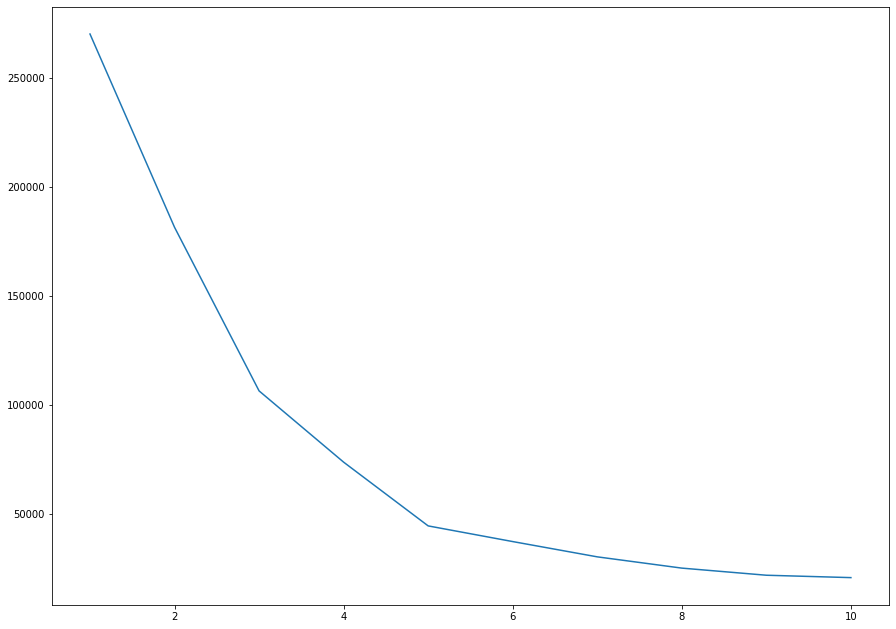

In [4]:
#Elbow Method
from sklearn.cluster import KMeans
wcss =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++',max_iter = 300, n_init = 10 , random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (15,11))
plt.plot(range(1,11),wcss)

In [5]:
kmeans = KMeans(n_clusters=5,init = 'k-means++',max_iter = 300, n_init = 10 , random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [37]:
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [6]:
data['ClusterNumber'] = y_kmeans
clusters = {4: 'Sensible',
           3: 'Careless',
           2: 'Target',
           1: 'Standard',
           0: 'Careful'}

data['ClusterName'] = data['ClusterNumber'].map(clusters)

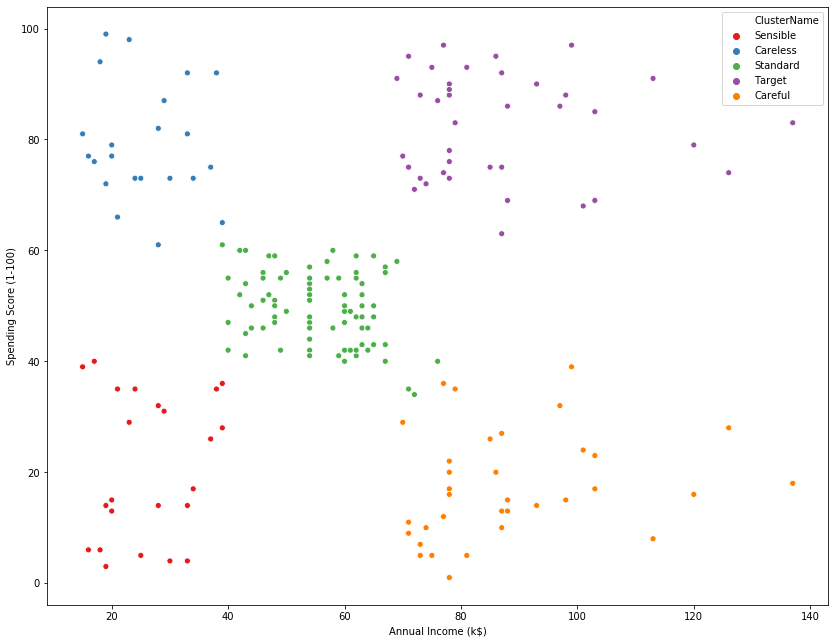

In [8]:
from seaborn import scatterplot
plt.figure(figsize=(14,11))
scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',data = data, hue ='ClusterName', palette='Set1')

Text(0, 0.5, 'Spending Score')

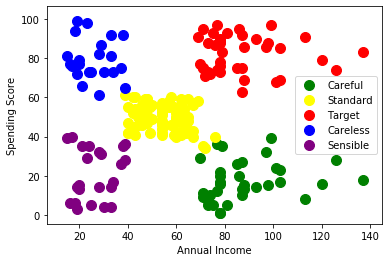

In [38]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s = 100, c = 'green', label = 'Careful')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s = 100, c = 'yellow', label = 'Standard')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s = 100, c = 'red', label = 'Target')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s = 100, c = 'blue', label = 'Careless')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1], s = 100, c = 'purple', label = 'Sensible')
plt.legend()
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

In [4]:
dataset = pd.read_csv('C:\\Users\\Ufuk Altan\\Downloads\\Downloads\\Data Science\\Prosperity.csv')
dataset.head()

,Country,GDP Per Capita,Technology,Human Capital,Institutional Framework,Sustainable Resources,Demand Environment,Education,Happiness,Unemployment Rate,Population,Import Degree,Import Eigenvector,Import Betweenness,Export Degree,Export Eigenvector,Export Betweenness,Location
0,Albania,5260.9,3.40,4.62,4.70,6.19,3.16,1153,4.719,0.120,2880248,0,0.000000,0.000000,0,0.000000,0.000000,Europe
1,Algeria,4449.8,2.97,3.58,3.60,5.36,5.00,1086,5.211,0.117,43216262,3,0.022113,0.000000,3,0.029143,0.000000,Africa
2,Argentina,10667.1,3.78,4.94,4.16,5.84,4.99,1187,6.086,0.101,44866075,6,0.043574,0.000000,4,0.038238,0.000000,South America
3,Armenia,4190.2,3.53,5.07,4.93,5.85,3.68,1345,4.559,0.169,2958996,0,0.000000,0.000000,0,0.000000,0.000000,Middle East
4,Australia,56698.1,6.91,7.41,8.32,6.47,5.78,1556,7.228,0.052,25265536,20,0.098483,0.003389,21,0.129649,0.003652,Oceania


In [6]:
Z = dataset.iloc[:, 1:3]

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = )